In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [52]:
df = pd.read_csv("data/deepsolar_tract1.csv", encoding="utf-8")

In [53]:
# Number of solar systems per thousand households
df = df[df.state == 'ca']
df["solar_systems_per_thousand_households"] = (df["solar_system_count"] / df["household_count"]) * 1000
df = df.drop(['county', 'state', 'heating_fuel_coal_coke', 'heating_fuel_electricity', 'heating_fuel_fuel_oil_kerosene',
                  'heating_fuel_gas', 'heating_fuel_housing_unit_count', 'heating_fuel_none', 'heating_fuel_other', 'heating_fuel_solar',
                  'land_area', 'per_capita_income', 'population', 'state', 'total_area', 'water_area',
              #    'heating_fuel_gas_rate',
              #'heating_fuel_electricity_rate',
              #'heating_fuel_fuel_oil_kerosene_rate',
              #'heating_fuel_coal_coke_rate',
              #    'heating_fuel_solar_rate',
              #'heating_fuel_other_rate',
              #'heating_fuel_none_rate',
              'solar_panel_area_per_capita', 'median_household_income',
                 'electricity_price_industrial', 'electricity_price_transportation', 'electricity_price_overall', 'electricity_consume_commercial',
                  'electricity_consume_industrial', 'electricity_consume_total', 'household_count', 'average_household_size',
                  'housing_unit_count', 'housing_unit_occupied_count',
              'housing_unit_median_value', 'lat', 'lon', 'elevation',
                  'heating_design_temperature', 'cooling_design_temperature', 'earth_temperature_amplitude', 'frost_days', 'air_temperature',
                  'relative_humidity', 'daily_solar_radiation', 'atmospheric_pressure', 'wind_speed', 'earth_temperature', 'heating_degree_days',
                  'cooling_degree_days',
              #'household_type_family_rate',
              #    'dropout_16_19_inschool_rate',
               #    'occupation_construction_rate',
              # 'occupation_public_rate',
              #'occupation_information_rate',
               #   'occupation_finance_rate', 'occupation_education_rate', 'occupation_administrative_rate', 'occupation_manufacturing_rate',
               #   'occupation_wholesale_rate', 'occupation_retail_rate', 'occupation_transportation_rate', 'occupation_arts_rate', 'occupation_agriculture_rate',
               #  'occupancy_vacant_rate', 'occupancy_owner_rate',
               #'mortgage_with_rate', 'transportation_home_rate', 'transportation_car_alone_rate',
                #  'transportation_walk_rate', 'transportation_carpool_rate', 'transportation_motorcycle_rate', 'transportation_bicycle_rate',
                #  'transportation_public_rate', 'travel_time_less_than_10_rate', 'travel_time_10_19_rate', 'travel_time_20_29_rate',
                #  'travel_time_30_39_rate', 'travel_time_40_59_rate', 'travel_time_60_89_rate', 'health_insurance_public_rate', 'health_insurance_none_rate',
                  'travel_time_average', 'electricity_price_residential', 'electricity_price_commercial', 'electricity_consume_residential',
                 'incentive_count_residential', 'incentive_count_nonresidential', 'incentive_residential_state_level', 'net_metering', 'feedin_tariff',
                  'cooperate_tax', 'property_tax', 'sales_tax', 'rebate', 'avg_electricity_retail_rate', 'incentive_nonresidential_state_level',
              'Unnamed: 0','tile_count',
 'solar_system_count',
 'total_panel_area',
 'fips', 'education_bachelor',
 'education_college',
 'education_doctoral',
 'education_high_school_graduate',
 'education_less_than_high_school',
 'education_master',
 'education_population',
 'education_professional_school', 'poverty_family_count',
 'race_asian',
 'race_black_africa',
 'race_indian_alaska',
 'race_islander',
 'race_other',
 'race_two_more',
 'race_white',
 'unemployed', 'number_of_solar_system_per_household', 'voting_2012_dem_win', 'voting_2016_dem_win', 'solar_panel_area_divided_by_area',
 'tile_count_residential',
 'tile_count_nonresidential',
 'solar_system_count_residential',
 'solar_system_count_nonresidential',
 'total_panel_area_residential',
 'total_panel_area_nonresidential', 'poverty_family_below_poverty_level', 'employed'], axis=1)

df = df.dropna()
df.shape

(7836, 78)

In [59]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

x = df.drop("solar_systems_per_thousand_households", axis=1)
y = df['solar_systems_per_thousand_households']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=42, shuffle=True)

xgb_reg = xgb.XGBRegressor(max_depth=6, n_estimators=100,
                           objective='reg:squarederror', booster='gbtree',
                           random_state=42, learning_rate=0.10)

xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test)
y_true = y_test
MSE = mse(y_true, y_pred)
RMSE = np.sqrt(MSE)

R_squared = r2_score(y_true, y_pred)

print("RMSE: ", np.round(RMSE, 2))
print("R-Squared: ", np.round(R_squared, 2))

RMSE:  52.28
R-Squared:  0.45


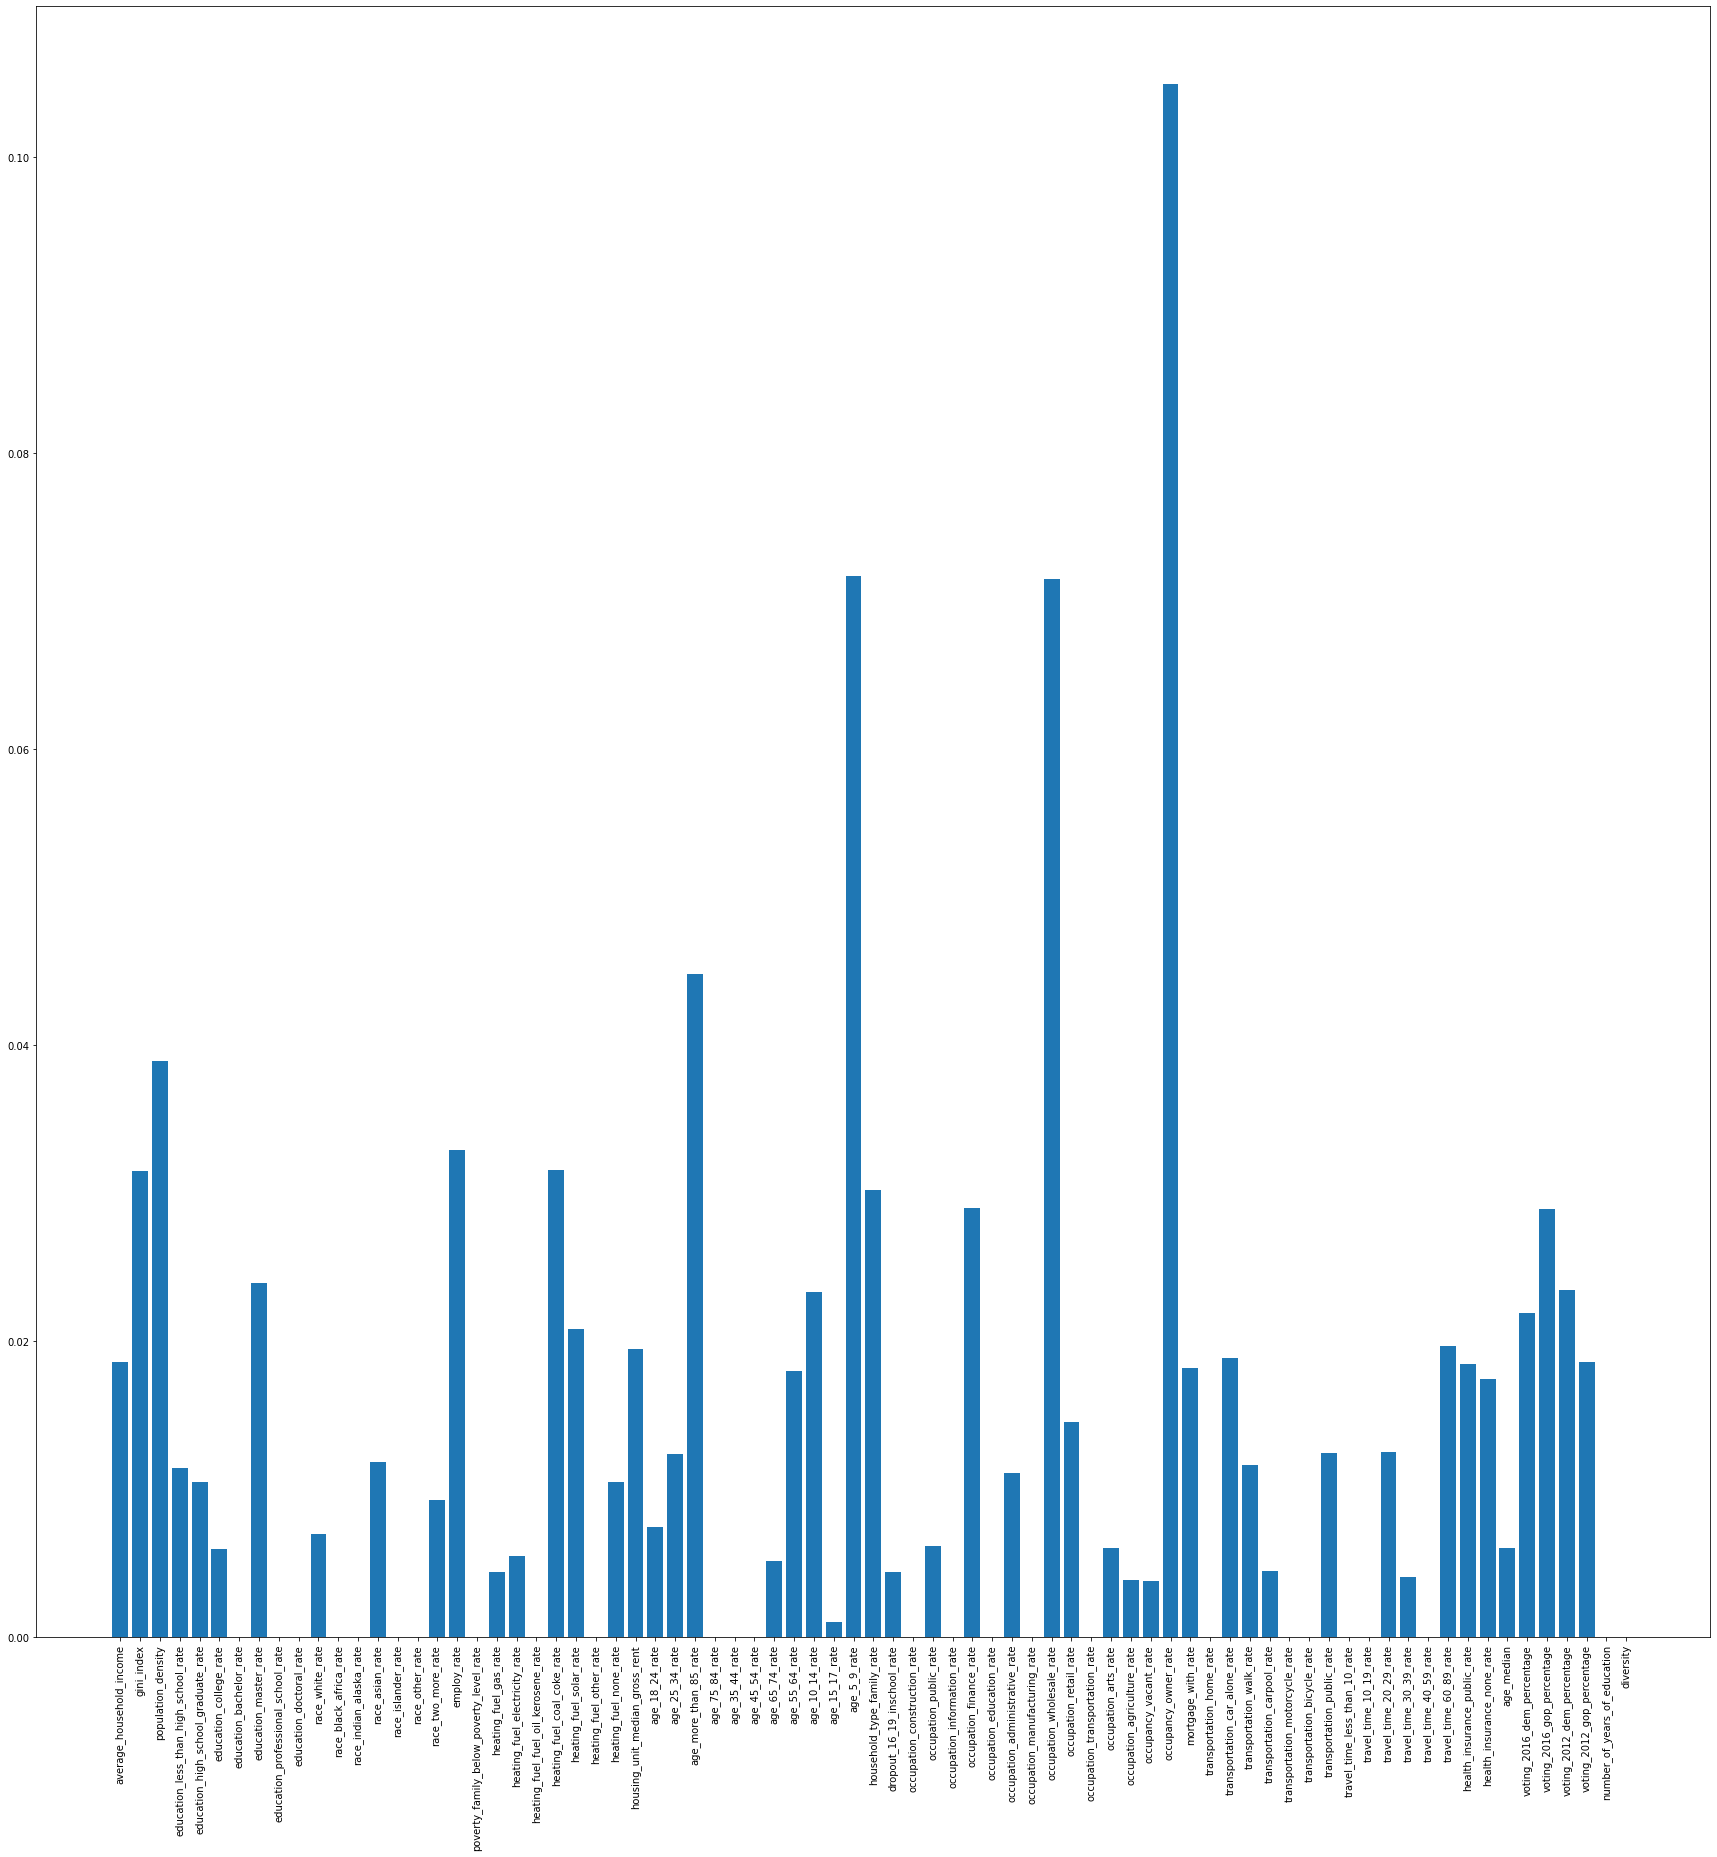

In [55]:
from matplotlib.pyplot import figure
figure(figsize=(30, 30))
plt.bar(X_train.columns,xgb_reg.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [56]:
[col for col in df.columns]

['average_household_income',
 'gini_index',
 'population_density',
 'education_less_than_high_school_rate',
 'education_high_school_graduate_rate',
 'education_college_rate',
 'education_bachelor_rate',
 'education_master_rate',
 'education_professional_school_rate',
 'education_doctoral_rate',
 'race_white_rate',
 'race_black_africa_rate',
 'race_indian_alaska_rate',
 'race_asian_rate',
 'race_islander_rate',
 'race_other_rate',
 'race_two_more_rate',
 'employ_rate',
 'poverty_family_below_poverty_level_rate',
 'heating_fuel_gas_rate',
 'heating_fuel_electricity_rate',
 'heating_fuel_fuel_oil_kerosene_rate',
 'heating_fuel_coal_coke_rate',
 'heating_fuel_solar_rate',
 'heating_fuel_other_rate',
 'heating_fuel_none_rate',
 'housing_unit_median_gross_rent',
 'age_18_24_rate',
 'age_25_34_rate',
 'age_more_than_85_rate',
 'age_75_84_rate',
 'age_35_44_rate',
 'age_45_54_rate',
 'age_65_74_rate',
 'age_55_64_rate',
 'age_10_14_rate',
 'age_15_17_rate',
 'age_5_9_rate',
 'household_type_fa